In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

=====  2006
=====  2007
=====  2008
=====  2009
=====  2010
=====  2011
=====  2012
=====  2013
=====  2014
=====  2015
=====  2016
=====  2017
=====  2018
=====  2019


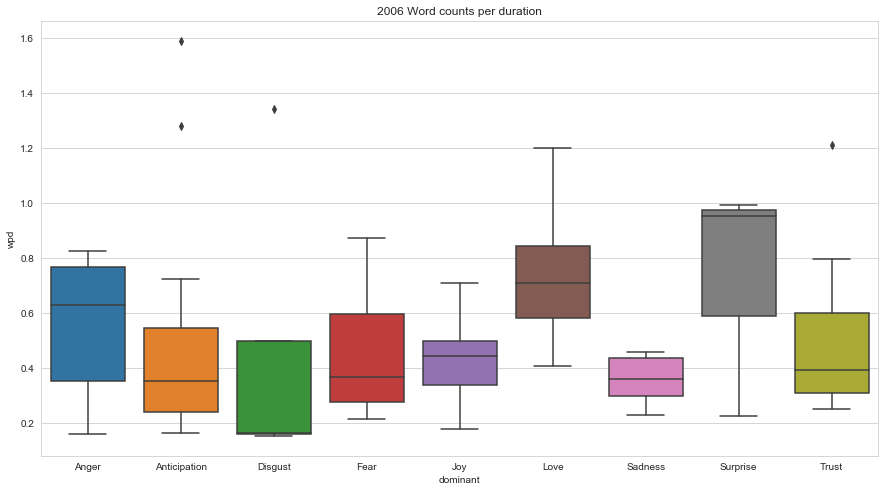

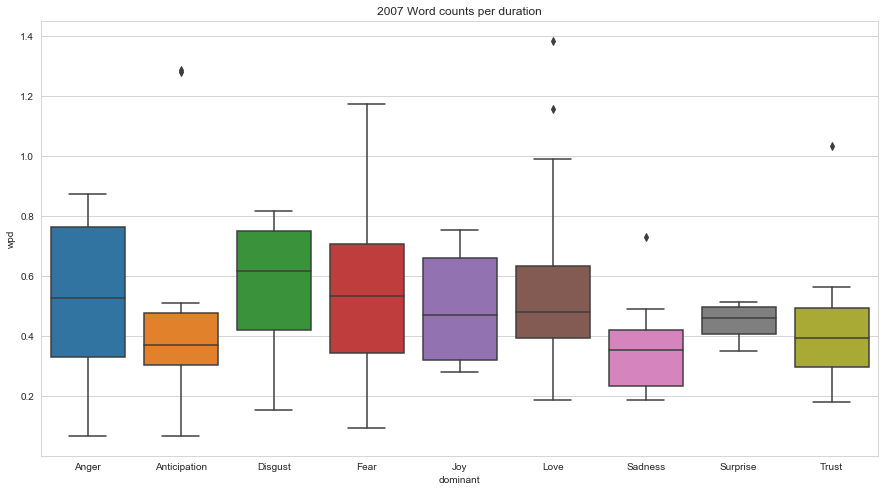

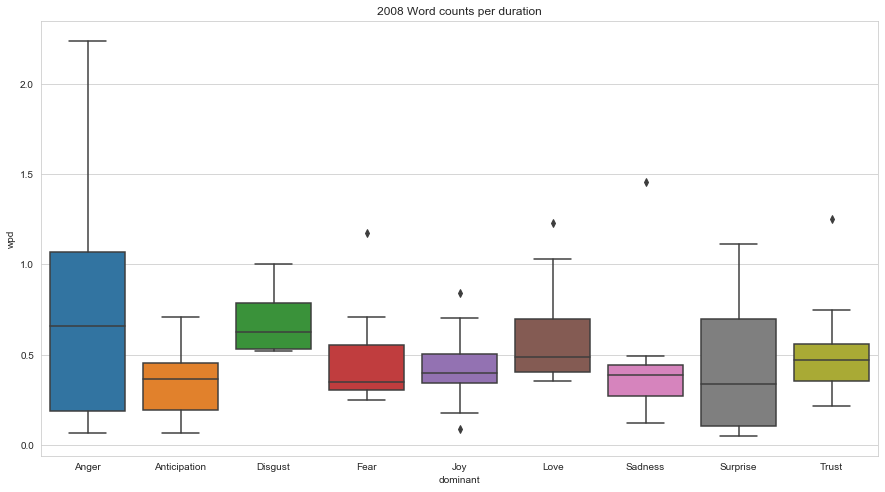

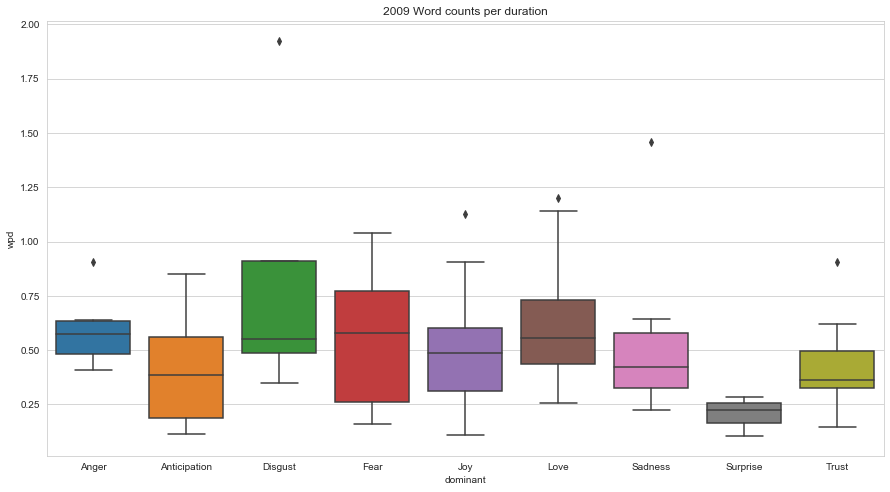

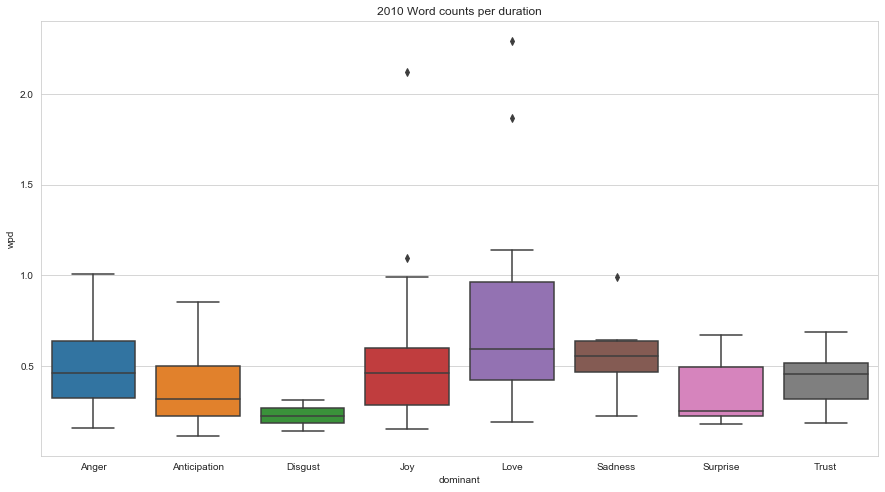

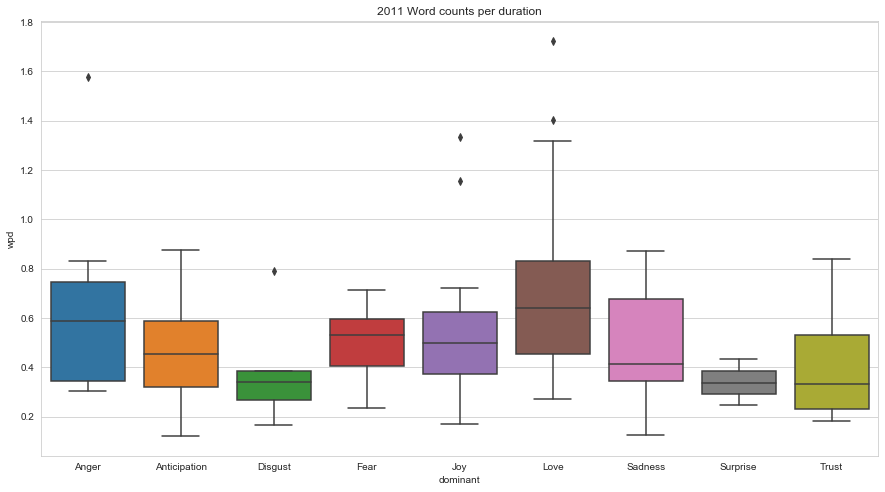

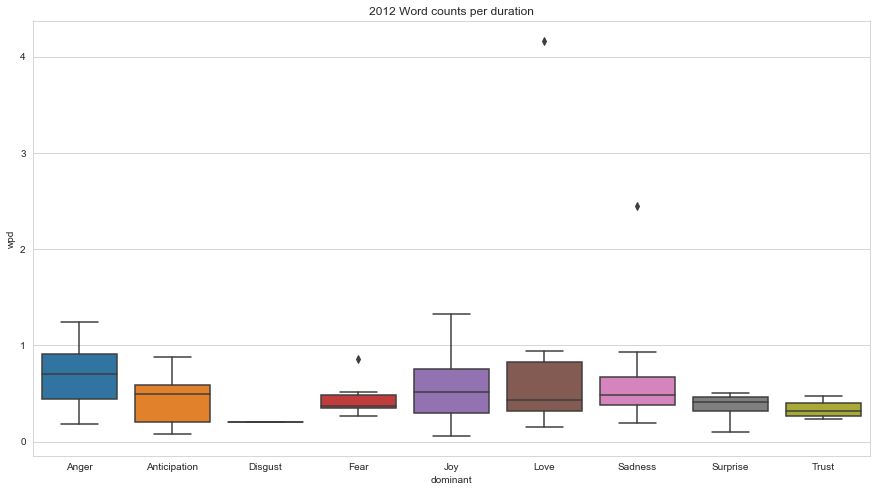

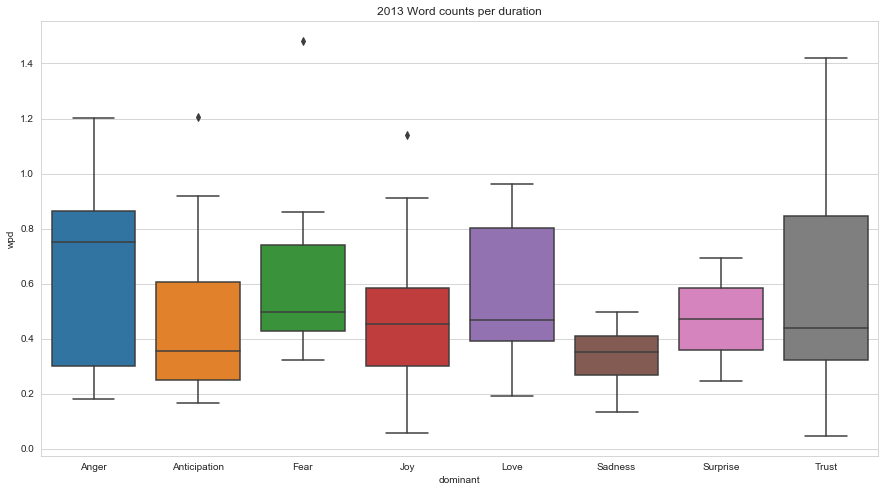

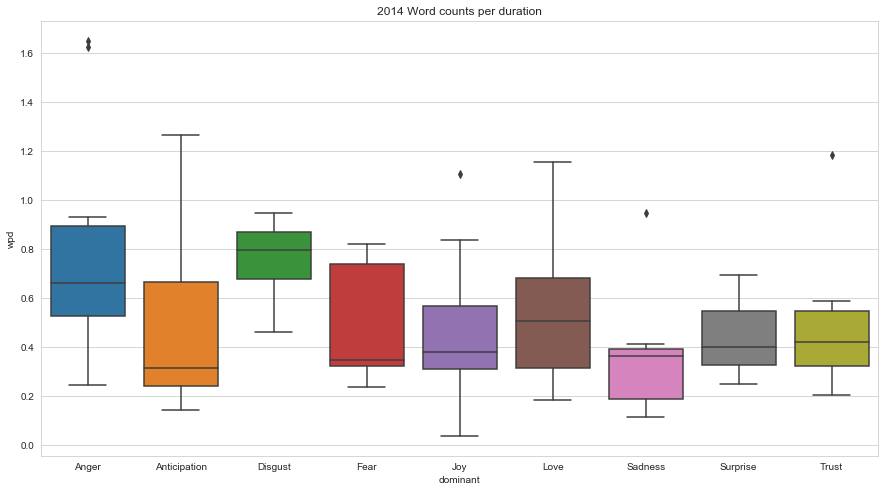

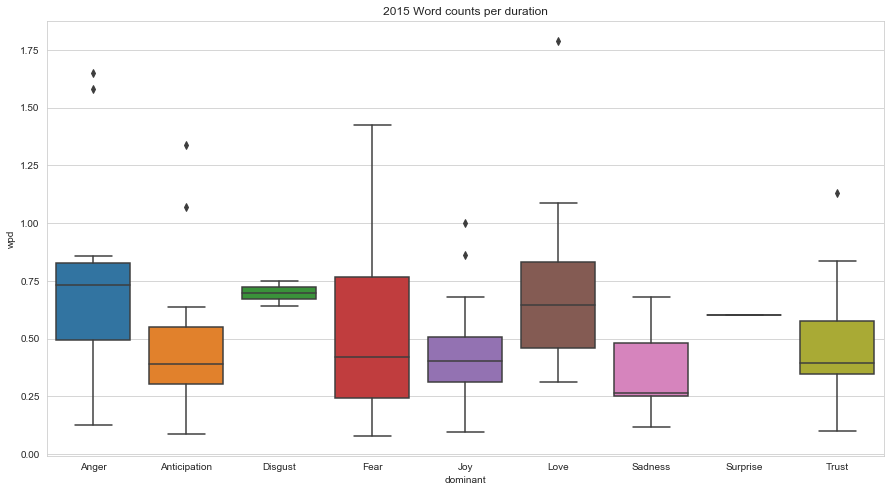

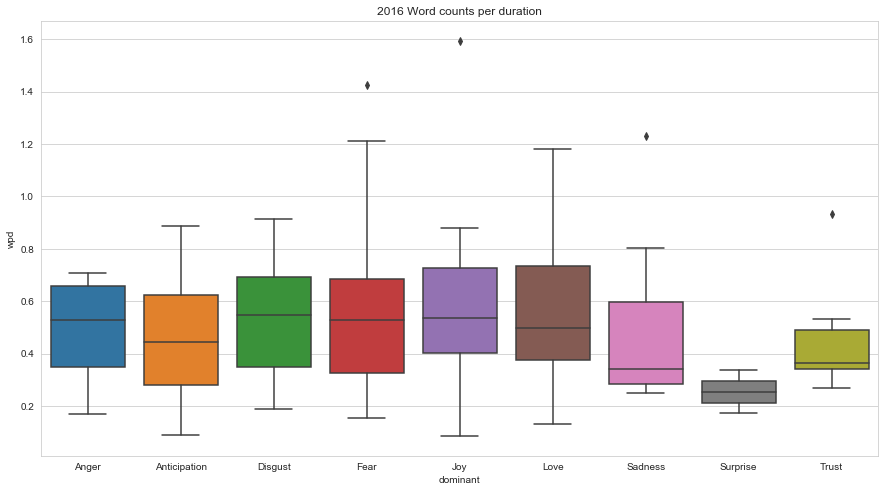

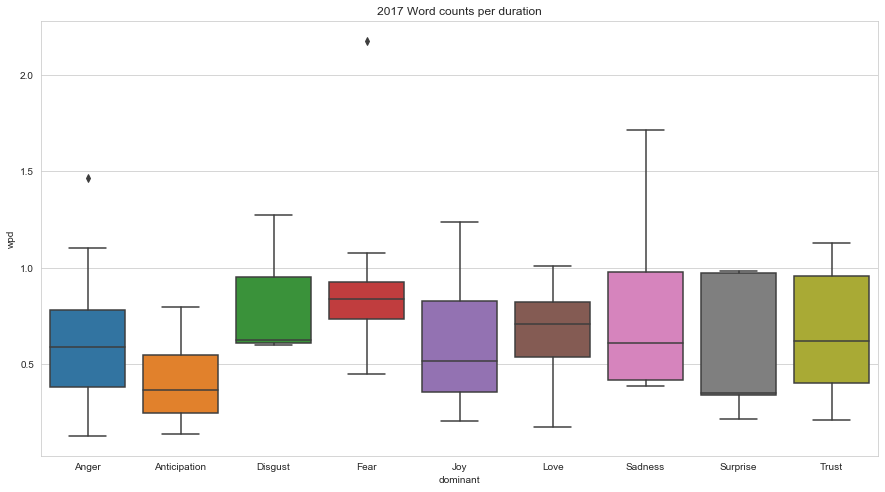

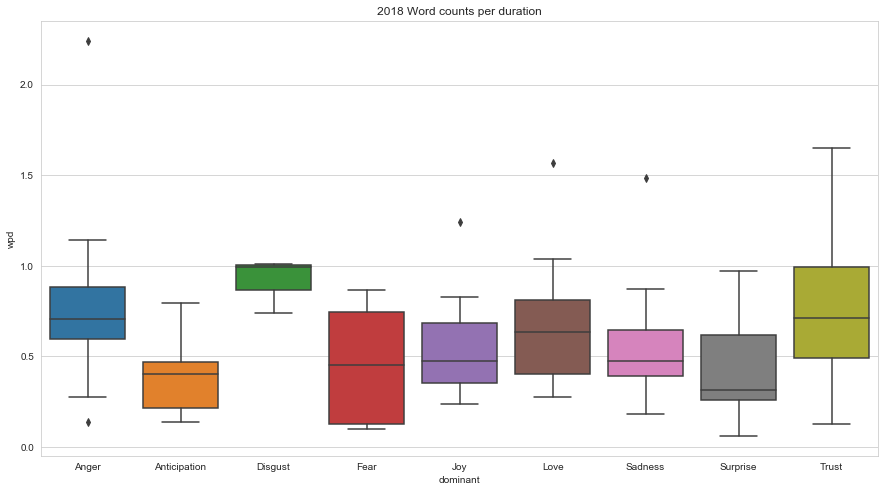

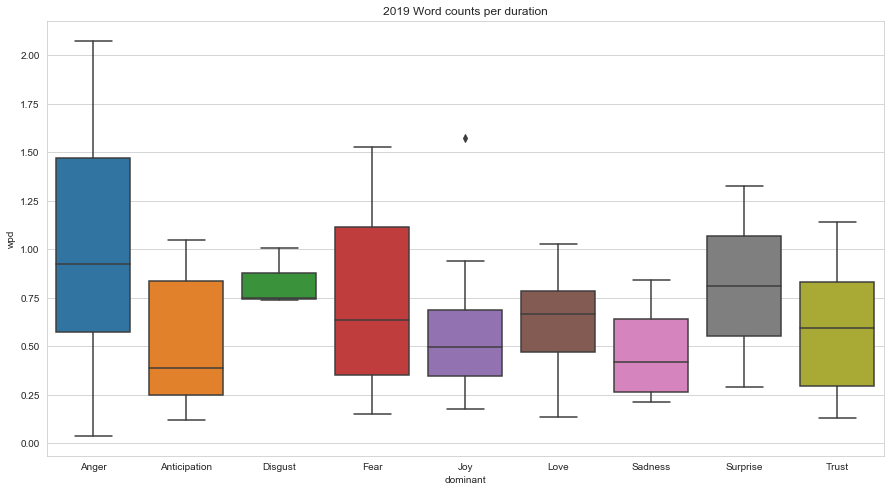

In [178]:
total = pd.DataFrame() #the whole information of wdp(wordcount/duration) and dominant sentiment
sns.set_style('whitegrid')

for year in range(2006, 2020):
    print("===== ", year)
    data = pd.read_csv("./Analysis_Result_2/result_"+str(year)+" (1).csv")
    
    result = pd.DataFrame(data.loc[:,'dominant'])
    r = []
    # Calculate every songs' word_count/duration
    for i in range(len(data)):
        word_count = data.loc[i][5:].sum()
        duration = data.loc[i]['duration']
        #print("Number of Words divided by song's duration", word_count/duration)
        r.append(word_count/duration)
    result['wpd'] = r
    result['year'] = year
    result = result.sort_values(by=['dominant']) # sort by dominant alphabetically
    
    total = pd.concat([total, result])

    plt.figure(figsize = (15,8))
    plt.title(str(year)+" Word counts per duration")
    sns.boxplot(x = "dominant", y = "wpd", data = result)

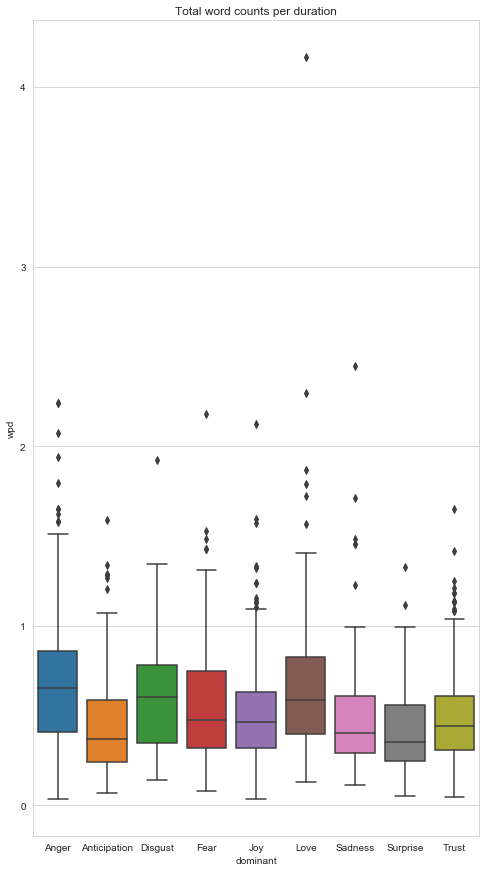

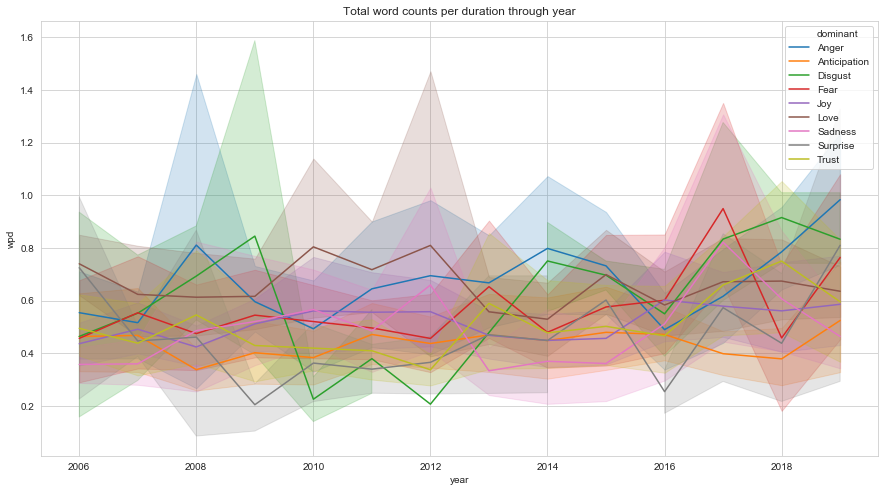

In [179]:
total = total.sort_values(by=['dominant']) # sort by dominant alphabetically
sns.set_style('whitegrid')

# TOTAL RESULT 1 :: word_count/duration
plt.figure(figsize = (8,15))
plt.title("Total word counts per duration")
sns.boxplot(x = "dominant", y = "wpd", data = total)

# TOTAL RESULT 2 :: differences between years
plt.figure(figsize = (15,8))
plt.title("Total word counts per duration through year")
sns.lineplot(x = "year", y = "wpd", hue="dominant", data = total)
